In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)

(1151, 19)

In [2]:
 
from sklearn.tree import DecisionTreeClassifier
tuned_parametersTree = [{'max_depth':[1,2,3,4,5,6,7,8,9,10,20,40,50], 'random_state': [0] }]
clf_tree = GridSearchCV(DecisionTreeClassifier(), tuned_parametersTree,  cv=shuffle_split, scoring='f1_micro',return_train_score=True)
clf_tree.fit(X_train, Y_train)
print("Best parameters set found on development set:")
print()
print(clf_tree.best_params_)
print()
print("mean training:")
print()
print(clf_tree.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_tree.cv_results_['mean_test_score'])
print("mean time:")
print()
print(clf_tree.cv_results_['mean_fit_time'])
print("Final real Test set score: {:.2f}".format(clf_tree.score(X_test, Y_test)))

Best parameters set found on development set:

{'max_depth': 2, 'random_state': 0}

mean training:

[ 0.58059006  0.65124224  0.67065217  0.70791925  0.73618012  0.77686335
  0.80636646  0.83478261  0.86118012  0.88944099  0.99829193  1.          1.        ]
mean test:

[ 0.56459627  0.62049689  0.60310559  0.59751553  0.59440994  0.60434783
  0.59130435  0.59440994  0.58695652  0.56832298  0.57701863  0.5863354
  0.5863354 ]
mean time:

[ 0.0021806   0.00260749  0.00240138  0.00280776  0.00317707  0.00391815
  0.00412083  0.00448523  0.00501196  0.00549991  0.00614252  0.0061789
  0.00567613]
Final real Test set score: 0.64


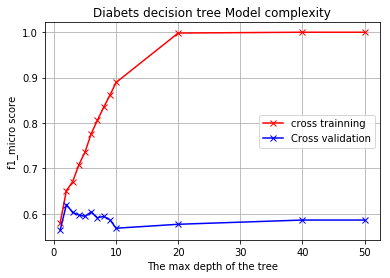

In [5]:
btree=[1,2,3,4,5,6,7,8,9,10,20,40,50]
plt.grid()
plt.plot(btree,clf_tree.cv_results_['mean_train_score'],'x-',color="r")
plt.plot(btree,clf_tree.cv_results_['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('The max depth of the tree')
plt.ylabel('f1_micro score')
plt.title('Diabets decision tree Model complexity')
plt.show()

In [6]:
sample_size=np.arange(50,560,20)
shuffle_split2 = ShuffleSplit(test_size=.1, train_size=.9, n_splits=10)
from sklearn.model_selection import learning_curve
samples, sample_train, sample_valid=learning_curve(DecisionTreeClassifier(max_depth=2,random_state=0),X_train_scaledStandard, Y_train,  train_sizes=sample_size, cv=shuffle_split2)

Text(0.5,1,'learning curve for Diabetes decision tree model')

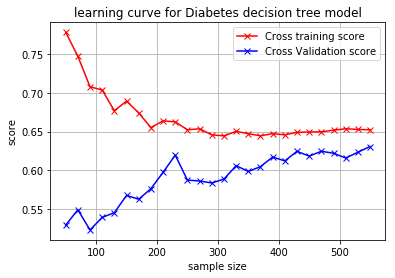

In [7]:
plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Cross training score")
plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
plt.legend(loc="best")
plt.grid()
plt.xlabel('sample size')
plt.ylabel('score')
plt.title('learning curve for Diabetes decision tree model' )

In [10]:
display(pd.DataFrame(clf_tree.cv_results_))

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_random_state,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002181,0.001235,0.564596,0.580590,1,0,"{'max_depth': 1, 'random_state': 0}",13,0.571429,0.586957,...,0.614907,0.562112,0.577640,0.574534,0.571429,0.585404,0.001213,0.000709,0.034184,0.010610
1,0.002607,0.000939,0.620497,0.651242,2,0,"{'max_depth': 2, 'random_state': 0}",1,0.596273,0.658385,...,0.645963,0.645963,0.639752,0.647516,0.658385,0.639752,0.001224,0.000219,0.034297,0.006916
2,0.002401,0.000692,0.603106,0.670652,3,0,"{'max_depth': 3, 'random_state': 0}",3,0.590062,0.666149,...,0.639752,0.649068,0.639752,0.650621,0.608696,0.684783,0.000281,0.000220,0.033500,0.014324
3,0.002808,0.000546,0.597516,0.707919,4,0,"{'max_depth': 4, 'random_state': 0}",4,0.565217,0.697205,...,0.571429,0.722050,0.633540,0.711180,0.565217,0.706522,0.000413,0.000100,0.030403,0.009013
4,0.003177,0.000511,0.594410,0.736180,5,0,"{'max_depth': 5, 'random_state': 0}",5,0.583851,0.711180,...,0.590062,0.765528,0.633540,0.734472,0.652174,0.720497,0.000255,0.000054,0.040066,0.015751
5,0.003918,0.000698,0.604348,0.776863,6,0,"{'max_depth': 6, 'random_state': 0}",2,0.596273,0.763975,...,0.565217,0.802795,0.633540,0.785714,0.608696,0.771739,0.000423,0.000337,0.020796,0.013715
6,0.004121,0.000578,0.591304,0.806366,7,0,"{'max_depth': 7, 'random_state': 0}",7,0.559006,0.796584,...,0.577640,0.819876,0.652174,0.801242,0.577640,0.807453,0.000355,0.000055,0.027749,0.011306
7,0.004485,0.000645,0.594410,0.834783,8,0,"{'max_depth': 8, 'random_state': 0}",5,0.552795,0.846273,...,0.627329,0.850932,0.645963,0.843168,0.571429,0.835404,0.000260,0.000215,0.031310,0.014652
8,0.005012,0.000732,0.586957,0.861180,9,0,"{'max_depth': 9, 'random_state': 0}",8,0.534161,0.877329,...,0.583851,0.878882,0.689441,0.875776,0.552795,0.864907,0.000488,0.000215,0.041504,0.018217
9,0.005500,0.000840,0.568323,0.889441,10,0,"{'max_depth': 10, 'random_state': 0}",12,0.540373,0.908385,...,0.565217,0.922360,0.639752,0.913043,0.577640,0.888199,0.000450,0.000321,0.036244,0.020291
